# Assignment: Visualizing Sales Data for a retail store chain
Objective: The purpose of this assignment is to help you learn how to use Matplotlib to create 
meaningful visualizations from real-world datasets. You will analyze and visualize sales data o 
a fictional retail store chain, applying the concepts of various plot types, customizations, a d
subplots.

### Scenario
You are a data analyst at a retail chain, "RetailMart," that operates in multiple cities. The 
management has tasked you with analyzing and presenting insights from the monthly sales data
Your goal is to use Matplotlib to create professional-grade visualizations for their quarter y
report.

In [1]:
# genereating a synthetic data set

import pandas as pd
import numpy as np
# Generate synthetic data
data = {"City": np.random.choice(
 ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"], size=100
 ),
 "Month": np.random.choice(
 ["January", "February", "March", "April", "May", "June", "July", "August", "September",
"October", "November", "December"], size=100
 ),
 "Revenue": np.random.randint(5000, 50000, size=100),
 "Number of Transactions": np.random.randint(50, 500, size=100),
 "Product Categories": np.random.choice(
 ["Electronics", "Clothing", "Groceries", "Books", "Furniture"], size=100
 ),
 "Customer Satisfaction Score": np.random.randint(1, 11, size=100),
}
# Create DataFrame
df = pd.DataFrame(data)
# Save to CSV
df.to_csv("sales_data.csv", index=False)
print(df.head())


          City      Month  Revenue  Number of Transactions Product Categories  \
0     New York      April    15643                     251          Groceries   
1      Houston  September    39520                     393          Furniture   
2      Houston   November    26664                     284        Electronics   
3  Los Angeles      April    18998                     348          Furniture   
4      Phoenix        May    21646                     127              Books   

   Customer Satisfaction Score  
0                            1  
1                           10  
2                            7  
3                            1  
4                            5  


### STEP 1: Visualize Monthly Revenue
1. Create a line chart showing the revenue trend across months for a selected city.
o Use markers to indicate individual data points.
o Customize the line style and color.
o Add grid lines, axis labels, and a title.

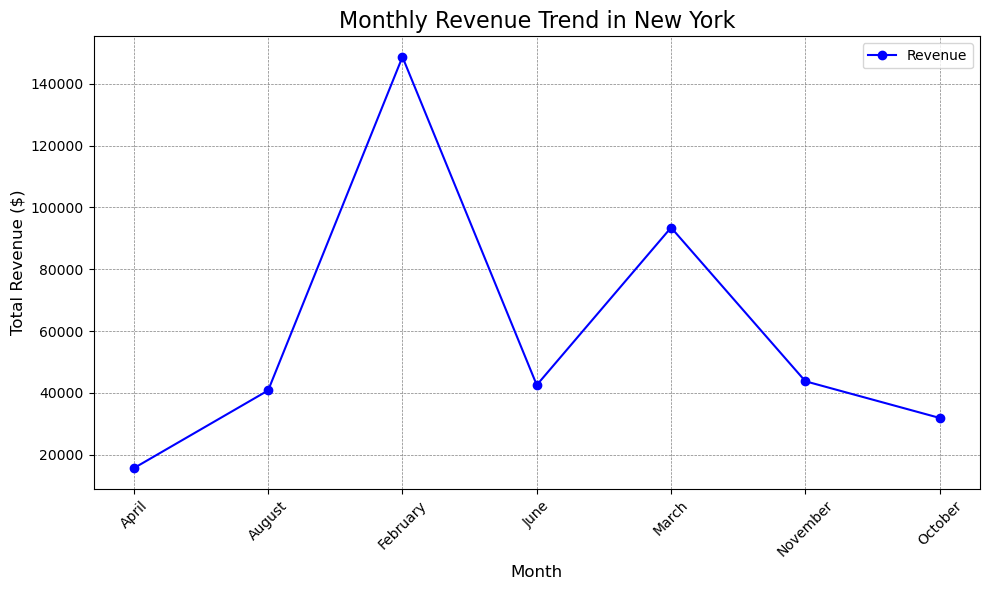

In [3]:
import matplotlib.pyplot as plt

#selecting New York
city = "New York"
city_data = df[df["City"] == city]

# Group by Month and calculate total revenue for each month
monthly_revenue = city_data.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-', color='b', label='Revenue')

plt.title(f"Monthly Revenue Trend in {city}", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.legend()


plt.tight_layout()
plt.show()

### STEP 2: Compare Product Categories
1. Use a bar chart to compare the total revenue generated by each product category for a
specific city.
2. Add labels to the bars to display exact revenue values.
3. Customize bar width and colors.

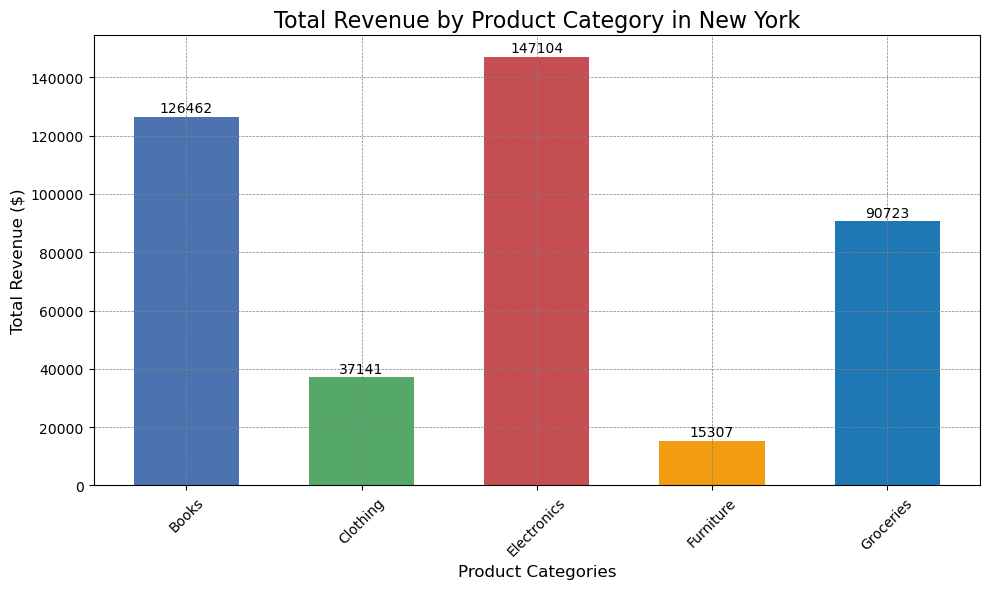

In [6]:
revenue=city_data.groupby('Product Categories')['Revenue'].sum()

plt.figure(figsize=(10,6))
bars=plt.bar(revenue.index, revenue.values, color=['#4C72B0', '#55A868', '#C44E52', '#F39C12', '#1F77B4'], width=0.6)


#adding labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title(f"Total Revenue by Product Category in {city}", fontsize=16)
plt.xlabel("Product Categories", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=45)  # Rotatig the x-axis labels for better readability
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

### STEP 3: Scatter plot of transactions vs revenue
1. Create a scatter plot to show the relationship between the number of transactions and
revenue for all cities.
2. Customize the dot size to represent customer satisfaction scores and the dot color to
represent cities.
3. Add a legend to explain the sizes and colors.

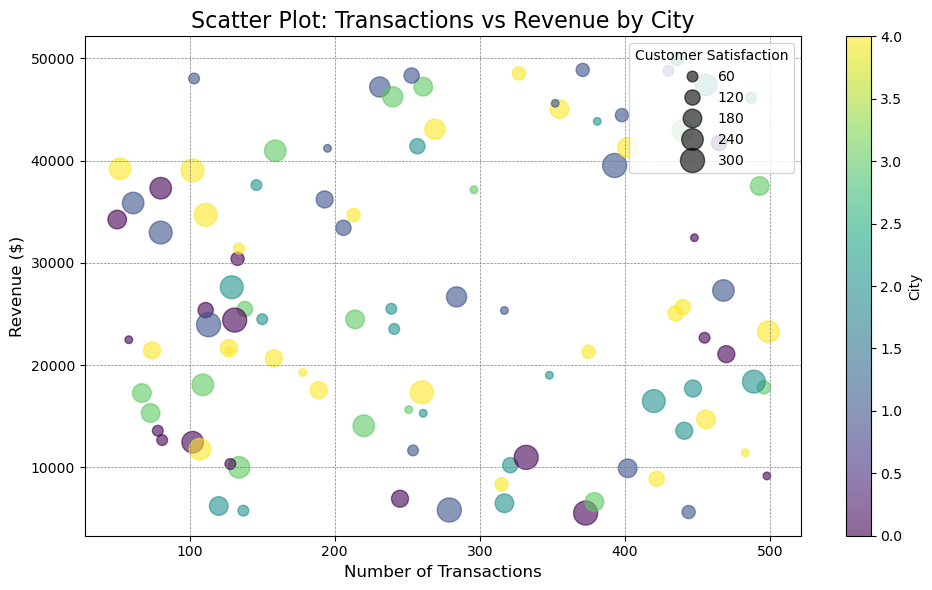

In [7]:
plt.figure(figsize=(10, 6))

# Set dot size to customer satisfaction score and dot color to city
scatter = plt.scatter(
    df["Number of Transactions"],  # x-axis: Number of Transactions
    df["Revenue"],  # y-axis: Revenue
    s=df["Customer Satisfaction Score"] * 30,  
    c=pd.Categorical(df["City"]).codes, 
    cmap="viridis",
    alpha=0.6  
)

plt.title("Scatter Plot: Transactions vs Revenue by City", fontsize=16)
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)


plt.colorbar(scatter, label="City")  
plt.legend(*scatter.legend_elements("sizes", num=5), title="Customer Satisfaction", loc="upper right")


plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

### STEP 4: City-wise revenue distribution
1. Create a pie chart to represent the percentage contribution of revenue from each city for 
the quarter.
2. Use the explode parameter to highlight the city with the highest revenue.
3. Add labels, a legend, and shadows to enhance the visualization.

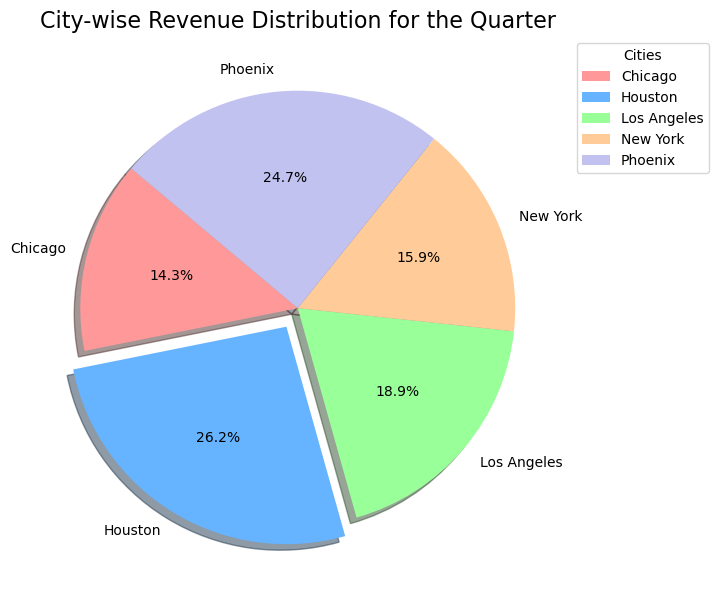

In [8]:
city_revenue= df.groupby('City')['Revenue'].sum()

#highlightint the city with max revenue
max_rev_city= city_revenue.idxmax()
explode = [0.1 if city == max_rev_city else 0 for city in city_revenue.index]

plt.figure(figsize=(10, 6))
plt.pie(
    city_revenue,
    labels=city_revenue.index, #city names as the labels
    autopct='%1.1f%%',  # show percentages
    startangle=140,  # start angle for the first slice
    explode=explode,  # highlight the city with the highest revenue
    shadow=True,  # add shadow for a 3D effect
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"],  # Custom colors

)
plt.title("City-wise Revenue Distribution for the Quarter", fontsize=16)
plt.legend(city_revenue.index, title="Cities", loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### STEP 5: Customer Satisfaction Analysis

1. Create a histogram of customer satisfaction scores across all cities.
2. Set the number of bins to 10 to represent score ranges (1–10)
3. Add appropriate titles, axis labels, and grid lines.

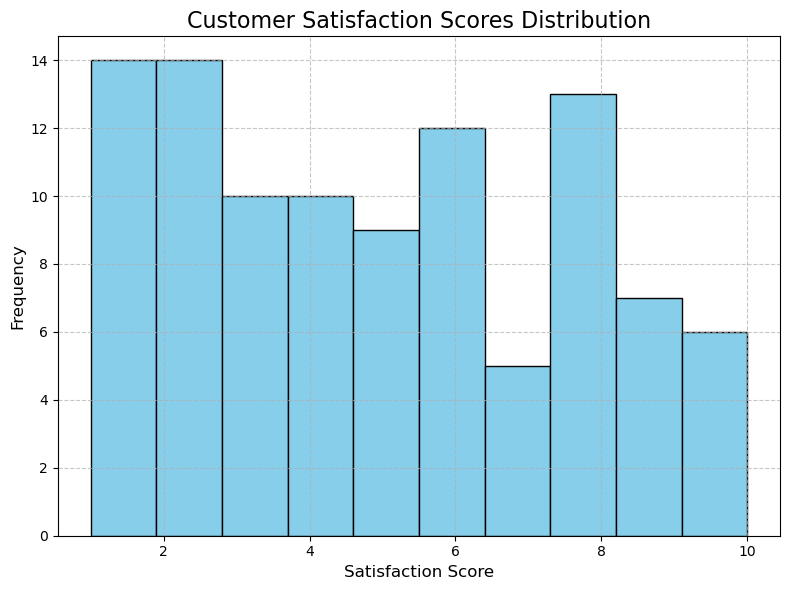

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df["Customer Satisfaction Score"], bins=10, edgecolor='black', color='skyblue')

plt.title("Customer Satisfaction Scores Distribution", fontsize=16)
plt.xlabel("Satisfaction Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### STEP 6: Subplots for Comparative analysis
1. Use subplots to display:
o A line chart for revenue trends.
o A bar chart for product category revenue.
o A scatter plot for transactions vs. revenue.
2. Add a supertitle for the entire figure summarizing the analysis.

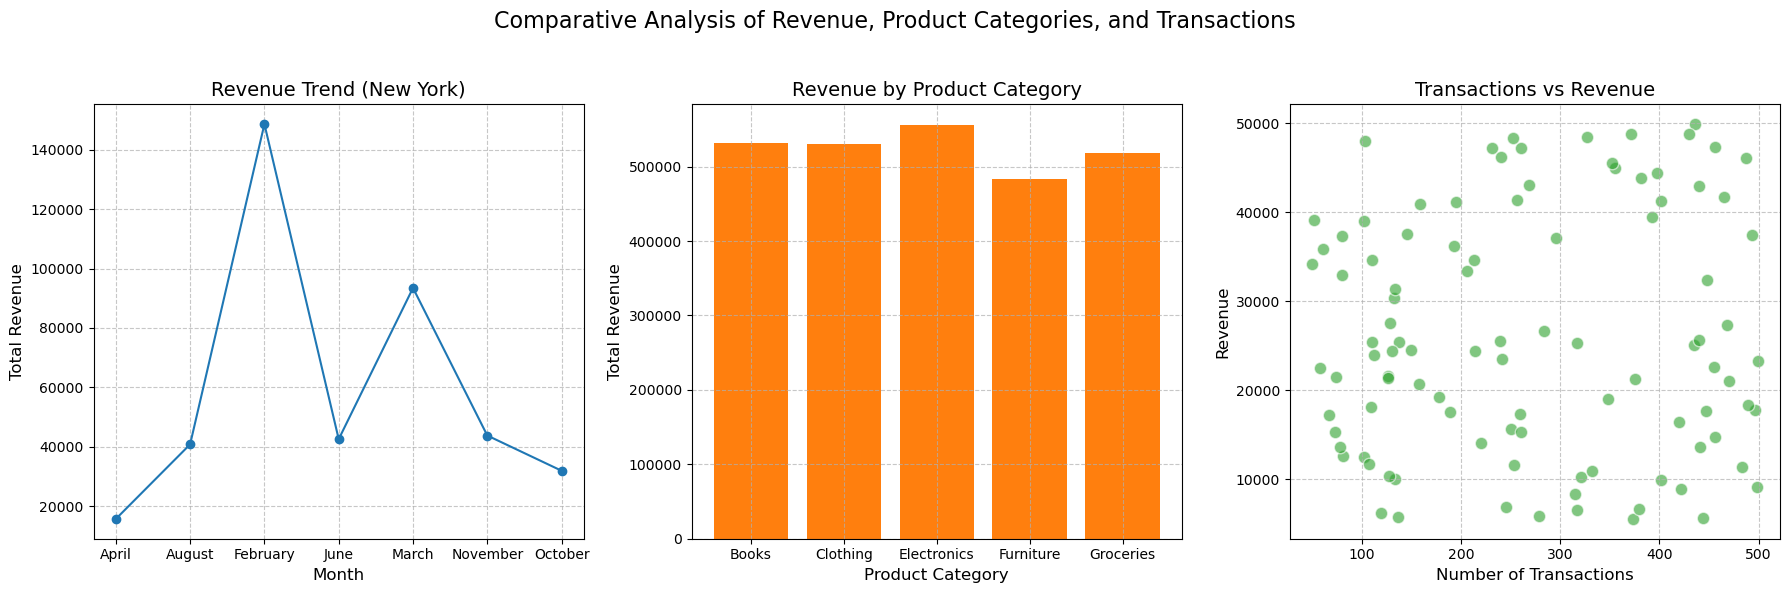

In [11]:
# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Line chart for revenue trends (for New York)
ny_data = df[df["City"] == "New York"].groupby("Month")["Revenue"].sum().sort_index()
axes[0].plot(ny_data.index, ny_data.values, marker='o', color='tab:blue')
axes[0].set_title("Revenue Trend (New York)", fontsize=14)
axes[0].set_xlabel("Month", fontsize=12)
axes[0].set_ylabel("Total Revenue", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# 2. Bar chart for Product Category Revenue
category_revenue = df.groupby("Product Categories")["Revenue"].sum()
axes[1].bar(category_revenue.index, category_revenue.values, color='tab:orange')
axes[1].set_title("Revenue by Product Category", fontsize=14)
axes[1].set_xlabel("Product Category", fontsize=12)
axes[1].set_ylabel("Total Revenue", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

# 3. Scatter plot for Transactions vs Revenue
axes[2].scatter(df["Number of Transactions"], df["Revenue"], c='tab:green', alpha=0.6, edgecolors="w", s=80)
axes[2].set_title("Transactions vs Revenue", fontsize=14)
axes[2].set_xlabel("Number of Transactions", fontsize=12)
axes[2].set_ylabel("Revenue", fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.7)

# Add a supertitle for the entire figure
plt.suptitle("Comparative Analysis of Revenue, Product Categories, and Transactions", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()